Decided to try out this fun little project mainly to work on my data visualization skills.

Comparing the cumulative-by-season stats of:
LeBron James, Michael Jordan, and Steph Curry

**GOAL:**

To see what basic stats correlate to points scored, and to make recommendations as to what each player should focus on to increase points scored (if they are still playing).

Other stats are visualized for anyone that's curious (and also to increase my practice reps).

This project applies to regular season stats only.

FGM - Field Goals Made

FGA - Field Goals Attempted

FG% - Field Goal % made

3PM - 3-point FGM

3PA - 3-point FGA

3P% - 3-point FG% made

FTM - Free throws made

FTA - Free throws attempted

FT% - Freee throw % made

TS% - True Shooting percentage - formula calculating % all shots attempted and made.

OREB & DREB - Offensive and Defensive Rebounds

TOV - Turnovers

PF - Personal Fouls

Plus-Minus - How much the player's team outscored his opponent while he is in the game. Negative score means the player's team was outscored while he was in the game.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import plotly.express as px
from scipy.stats import binom
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import stats
from sklearn.preprocessing import StandardScaler

In [2]:
#mount to Google Drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [3]:
#uploading data for all three players
lbj=pd.read_excel("/content/drive/MyDrive/Python Course/Datasets/LeBron James Career by season.xlsx")

In [4]:
mj=pd.read_excel("/content/drive/MyDrive/Python Course/Datasets/Michael Jordan Career by season.xlsx")

In [5]:
curry=pd.read_excel("/content/drive/MyDrive/Python Course/Datasets/Stephen Curry Career by Season.xlsx")

In [6]:
#checking info for LeBron
lbj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Season ending  22 non-null     int64  
 1   Games          22 non-null     int64  
 2   Minutes        22 non-null     int64  
 3   Points         22 non-null     int64  
 4   Rebounds       22 non-null     int64  
 5   Assists        22 non-null     int64  
 6   Steals         22 non-null     int64  
 7   Blocks         22 non-null     int64  
 8   FGM            22 non-null     int64  
 9   FGA            22 non-null     int64  
 10  FG%            22 non-null     float64
 11  3PM            22 non-null     int64  
 12  3PA            22 non-null     int64  
 13  3P%            22 non-null     float64
 14  FTM            22 non-null     int64  
 15  FTA            22 non-null     int64  
 16  FT%            22 non-null     float64
 17  TS%            22 non-null     float64
 18  OREB        

In [7]:
lbj.head()

,Season ending,Games,Minutes,Points,Rebounds,Assists,Steals,Blocks,FGM,FGA,...,3P%,FTM,FTA,FT%,TS%,OREB,DREB,TOV,PF,Plus-Minus
0,2004,79,3122,1654,432,465,130,58,622,1492,...,29.0,347,460,75.4,48.8,99,333,273,149,-144
1,2005,80,3388,2175,588,577,177,52,795,1684,...,35.1,477,636,75.0,55.4,111,477,262,146,152
2,2006,79,3361,2478,556,521,123,66,875,1823,...,33.5,601,814,73.8,56.8,75,481,260,181,275
3,2007,78,3190,2132,526,470,125,55,772,1621,...,31.9,489,701,69.8,55.2,83,443,250,171,377
4,2008,75,3027,2250,592,539,138,81,794,1642,...,31.5,549,771,71.2,56.8,133,459,255,165,139


In [8]:
lbj.tail()

,Season ending,Games,Minutes,Points,Rebounds,Assists,Steals,Blocks,FGM,FGA,...,3P%,FTM,FTA,FT%,TS%,OREB,DREB,TOV,PF,Plus-Minus
17,2021,45,1504,1126,346,350,48,25,422,823,...,36.5,178,255,69.8,60.2,29,317,168,70,287
18,2022,56,2084,1695,459,349,73,59,640,1221,...,35.9,254,336,75.6,61.9,63,396,196,121,-117
19,2023,55,1954,1590,457,375,50,32,609,1219,...,32.1,251,327,76.8,58.3,65,392,178,88,214
20,2024,71,2504,1822,518,589,89,38,685,1269,...,41.0,303,404,75.0,63.0,61,457,245,78,220
21,2025,70,2444,1710,546,575,70,39,651,1270,...,37.6,259,331,78.2,60.4,72,474,260,99,-54


In [9]:
#dropping percentage-based columns since I want to deal with total stats for each specific season
lbj=lbj.drop(["FG%","FT%","3P%","TS%","Plus-Minus"],axis=1)

In [10]:
lbj.head()

,Season ending,Games,Minutes,Points,Rebounds,Assists,Steals,Blocks,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,TOV,PF
0,2004,79,3122,1654,432,465,130,58,622,1492,63,217,347,460,99,333,273,149
1,2005,80,3388,2175,588,577,177,52,795,1684,108,308,477,636,111,477,262,146
2,2006,79,3361,2478,556,521,123,66,875,1823,127,379,601,814,75,481,260,181
3,2007,78,3190,2132,526,470,125,55,772,1621,99,310,489,701,83,443,250,171
4,2008,75,3027,2250,592,539,138,81,794,1642,113,359,549,771,133,459,255,165


In [11]:
lbj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Season ending  22 non-null     int64
 1   Games          22 non-null     int64
 2   Minutes        22 non-null     int64
 3   Points         22 non-null     int64
 4   Rebounds       22 non-null     int64
 5   Assists        22 non-null     int64
 6   Steals         22 non-null     int64
 7   Blocks         22 non-null     int64
 8   FGM            22 non-null     int64
 9   FGA            22 non-null     int64
 10  3PM            22 non-null     int64
 11  3PA            22 non-null     int64
 12  FTM            22 non-null     int64
 13  FTA            22 non-null     int64
 14  OREB           22 non-null     int64
 15  DREB           22 non-null     int64
 16  TOV            22 non-null     int64
 17  PF             22 non-null     int64
dtypes: int64(18)
memory usage: 3.2 KB


In [12]:
#double-checking data
lbj.shape

(22, 18)

In [13]:
lbj.describe().T

,count,mean,std,min,25%,50%,75%,max
Season ending,22.0,2014.500000,6.493587,2004.0,2009.25,2014.5,2019.75,2025.0
Games,22.0,71.000000,10.221360,45.0,67.50,75.5,78.75,82.0
Minutes,22.0,2683.727273,503.681606,1504.0,2355.50,2836.0,3047.25,3388.0
Points,22.0,1917.454545,323.995404,1126.0,1695.75,1937.0,2164.25,2478.0
Rebounds,22.0,533.227273,82.580945,346.0,471.75,539.5,589.50,709.0
Assists,22.0,526.545455,106.099561,349.0,466.25,530.0,584.50,747.0
Steals,22.0,106.590909,31.763500,48.0,80.75,115.5,125.00,177.0
Blocks,22.0,52.272727,18.124390,25.0,38.25,50.0,64.25,93.0
FGM,22.0,704.000000,106.583301,422.0,628.00,736.5,771.00,875.0
FGA,22.0,1390.136364,227.264959,823.0,1269.25,1353.5,1567.00,1823.0


In [14]:
#checking the data for the GOAT
mj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Season ending  15 non-null     int64  
 1   Games          15 non-null     int64  
 2   Minutes        15 non-null     int64  
 3   Points         15 non-null     int64  
 4   Rebounds       15 non-null     int64  
 5   Assists        15 non-null     int64  
 6   Steals         15 non-null     int64  
 7   Blocks         15 non-null     int64  
 8   FGM            15 non-null     int64  
 9   FGA            15 non-null     int64  
 10  FG%            15 non-null     float64
 11  3PM            15 non-null     int64  
 12  3PA            15 non-null     int64  
 13  3P%            15 non-null     float64
 14  FTM            15 non-null     int64  
 15  FTA            15 non-null     int64  
 16  FT%            15 non-null     float64
 17  TS%            15 non-null     float64
 18  OREB        

In [15]:
#dropping percentage-based columns since I want to deal with total stats for each specific season
mj=mj.drop(["FG%","FT%","3P%","TS%"],axis=1)

In [16]:
#double-checking data
mj.shape

(15, 18)

In [17]:
mj

,Season ending,Games,Minutes,Points,Rebounds,Assists,Steals,Blocks,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,TOV,PF
0,1985,82,3144,2313,534,481,196,69,837,1625,9,52,630,746,167,367,291,285
1,1986,18,451,408,64,53,37,21,150,328,3,18,105,125,23,41,45,46
2,1987,82,3281,3041,430,377,236,125,1098,2279,12,66,833,972,166,264,272,237
3,1988,82,3311,2868,449,485,259,131,1069,1998,7,53,723,860,139,310,252,270
4,1989,81,3255,2633,652,650,234,65,966,1795,27,98,674,793,149,503,290,247
5,1990,82,3197,2753,565,519,227,54,1034,1964,92,245,593,699,143,422,247,241
6,1991,82,3034,2580,492,453,223,83,990,1837,29,93,571,671,118,374,202,229
7,1992,80,3102,2404,511,489,182,75,943,1818,27,100,491,590,91,420,200,201
8,1993,78,3067,2541,522,428,221,61,992,2003,81,230,476,569,135,387,207,188
9,1995,17,668,457,117,90,30,13,166,404,16,32,109,136,25,92,35,47


In [18]:
mj.describe().T

,count,mean,std,min,25%,50%,75%,max
Season ending,15.0,1992.800000,5.595917,1985.0,1988.5,1992.0,1996.5,2003.0
Games,15.0,71.466667,22.617524,17.0,79.0,82.0,82.0,82.0
Minutes,15.0,2734.066667,928.394349,451.0,3032.5,3102.0,3189.0,3311.0
Points,15.0,2152.800000,816.555501,408.0,1976.5,2431.0,2606.5,3041.0
Rebounds,15.0,444.800000,159.566914,64.0,439.5,492.0,528.0,652.0
Assists,15.0,375.533333,156.829692,53.0,310.5,377.0,483.0,650.0
Steals,15.0,167.600000,72.864649,30.0,131.5,182.0,225.0,259.0
Blocks,15.0,59.533333,34.112978,13.0,40.5,54.0,72.0,131.0
FGM,15.0,812.800000,301.344179,150.0,758.0,920.0,991.0,1098.0
FGA,15.0,1635.800000,560.674747,328.0,1576.0,1837.0,1928.5,2279.0


In [19]:
#dropping percentage-based columns since I want to deal with total stats for each specific season
curry=curry.drop(["FG%","FT%","3P%","TS%"],axis=1)

In [20]:
#double-checking data
curry

,Season ending,Games,Minutes,Points,Rebounds,Assists,Steals,Blocks,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,TOV,PF
0,NaN,80,2896,1399,356,472,152,19,528,1143,166,380,177,200,48,308,243,252
1,2011.0,74,2489,1373,286,432,109,20,505,1053,151,342,212,227,52,234,226,233
2,2012.0,26,732,383,88,138,39,8,145,296,55,121,38,47,15,73,65,62
3,2013.0,78,2983,1786,314,539,126,12,626,1388,272,600,262,291,59,255,240,198
4,2014.0,78,2846,1873,334,666,128,14,652,1383,261,615,308,348,46,288,294,194
5,2015.0,80,2613,1900,341,619,163,16,653,1341,286,646,308,337,56,285,249,158
6,2016.0,79,2700,2375,430,527,169,15,805,1598,402,886,363,400,68,362,262,161
7,2017.0,79,2639,1999,353,524,142,17,675,1443,324,789,325,362,61,292,239,183
8,2018.0,51,1631,1346,261,310,80,8,428,864,212,501,278,302,36,225,153,114
9,2019.0,69,2331,1881,369,361,92,25,632,1340,354,810,263,287,45,324,192,166


In [21]:
curry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Season ending  15 non-null     float64
 1   Games          16 non-null     int64  
 2   Minutes        16 non-null     int64  
 3   Points         16 non-null     int64  
 4   Rebounds       16 non-null     int64  
 5   Assists        16 non-null     int64  
 6   Steals         16 non-null     int64  
 7   Blocks         16 non-null     int64  
 8   FGM            16 non-null     int64  
 9   FGA            16 non-null     int64  
 10  3PM            16 non-null     int64  
 11  3PA            16 non-null     int64  
 12  FTM            16 non-null     int64  
 13  FTA            16 non-null     int64  
 14  OREB           16 non-null     int64  
 15  DREB           16 non-null     int64  
 16  TOV            16 non-null     int64  
 17  PF             16 non-null     int64  
dtypes: float64(1

In [22]:
curry.iloc[0,0]=2010 #filling in only missing data point

In [23]:
curry['Season ending']=curry['Season ending'].round(0).astype(int) #taking out decimal points

In [24]:
curry.head()

,Season ending,Games,Minutes,Points,Rebounds,Assists,Steals,Blocks,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,TOV,PF
0,2010,80,2896,1399,356,472,152,19,528,1143,166,380,177,200,48,308,243,252
1,2011,74,2489,1373,286,432,109,20,505,1053,151,342,212,227,52,234,226,233
2,2012,26,732,383,88,138,39,8,145,296,55,121,38,47,15,73,65,62
3,2013,78,2983,1786,314,539,126,12,626,1388,272,600,262,291,59,255,240,198
4,2014,78,2846,1873,334,666,128,14,652,1383,261,615,308,348,46,288,294,194


In [25]:
#visualizing data side-by-side-by-side

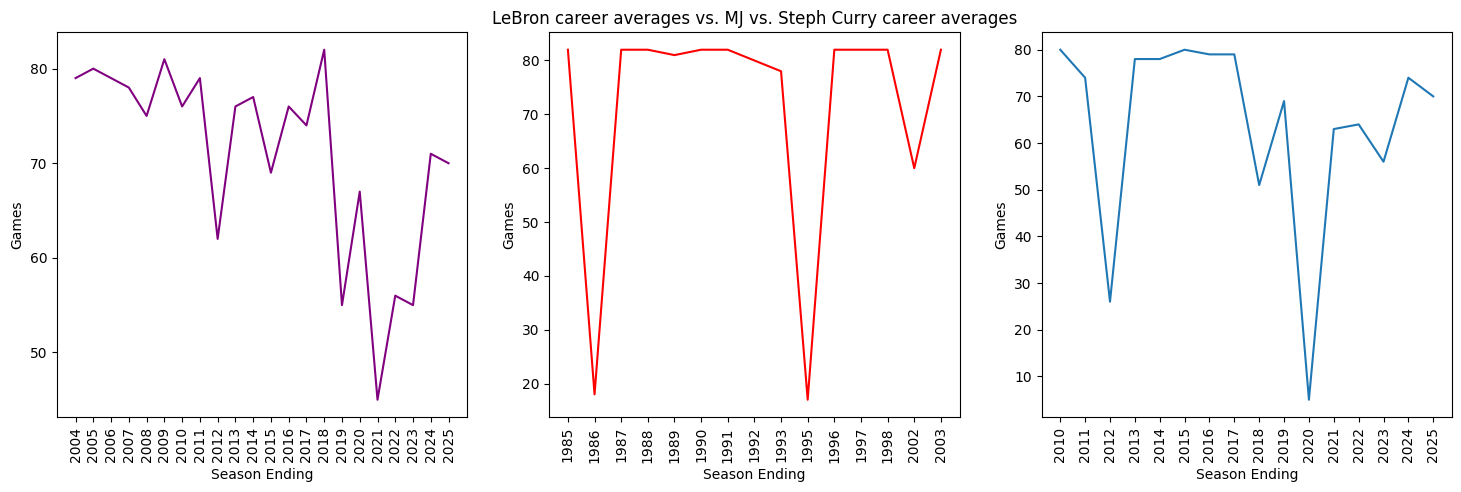

In [26]:
# Number of seasons played
x_lbj=range(1,23)
x_mj=range(1,16)
x_curry=range(1,17)

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_lbj, lbj['Season ending']) #labeling seasons by year (2002, 2003, etc.)
plt.yticks(range(0,82,10))
sns.lineplot(data=lbj, x=x_lbj,y="Games", color="purple"); #color-coded since he's currently a Laker (purple, yellow, and gold)

plt.subplot(1,3,2)
plt.title("LeBron career averages vs. MJ vs. Steph Curry career averages")
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_mj, mj['Season ending'])
sns.lineplot(data=mj, x=x_mj, y="Games", color="red"); #color-coded for his time with the Bulls (red and black)

plt.subplot(1,3,3)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_curry, curry['Season ending'])
sns.lineplot(data=curry, x=x_curry, y="Games"); #kept default blue color, convenient for the Warriors colors (blue and yellow)

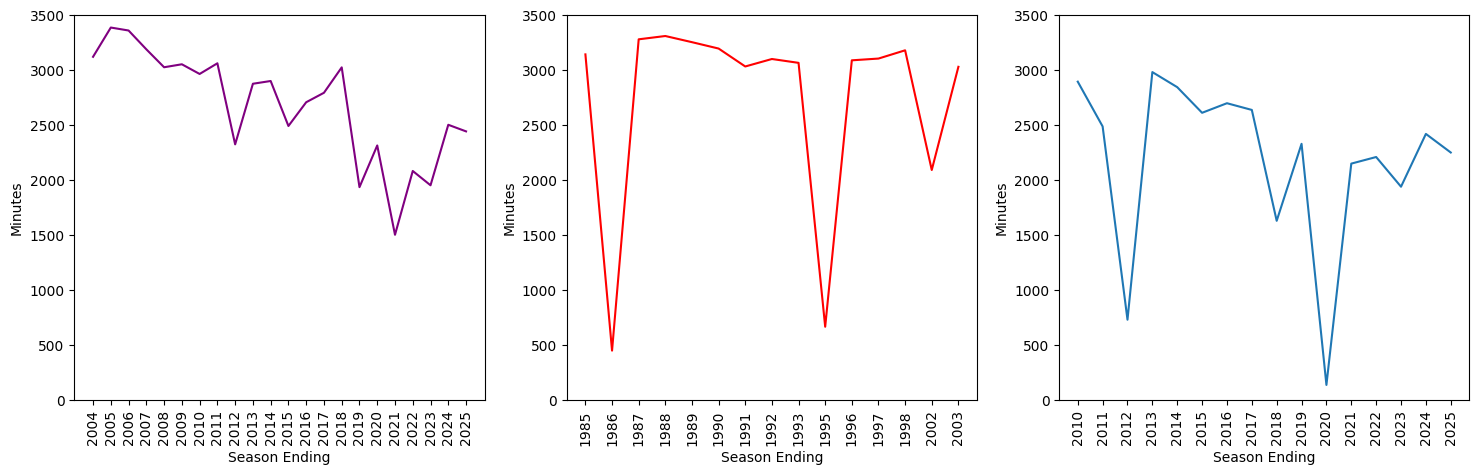

In [27]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_lbj, lbj['Season ending'])
plt.ylim(0,3500)
sns.lineplot(data=lbj, x=x_lbj,y="Minutes", color="purple");

plt.subplot(1,3,2)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_mj, mj['Season ending'])
plt.ylim(0,3500)
sns.lineplot(data=mj, x=x_mj, y="Minutes", color="red");

plt.subplot(1,3,3)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_curry, curry['Season ending'])
plt.ylim(0,3500)
sns.lineplot(data=curry, x=x_curry, y="Minutes");

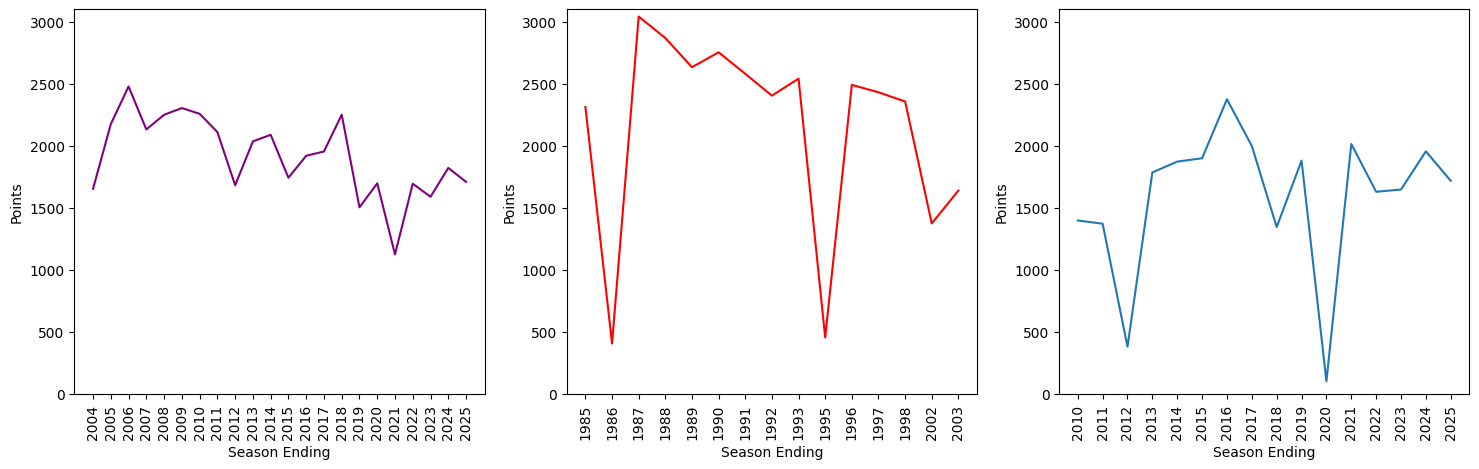

In [28]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_lbj, lbj['Season ending'])
plt.ylim(0,3100)
sns.lineplot(data=lbj, x=x_lbj,y="Points", color="purple");

plt.subplot(1,3,2)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_mj, mj['Season ending'])
plt.ylim(0,3100)
sns.lineplot(data=mj, x=x_mj, y="Points", color="red");

plt.subplot(1,3,3)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_curry, curry['Season ending'])
plt.ylim(0,3100)
sns.lineplot(data=curry, x=x_curry, y="Points");

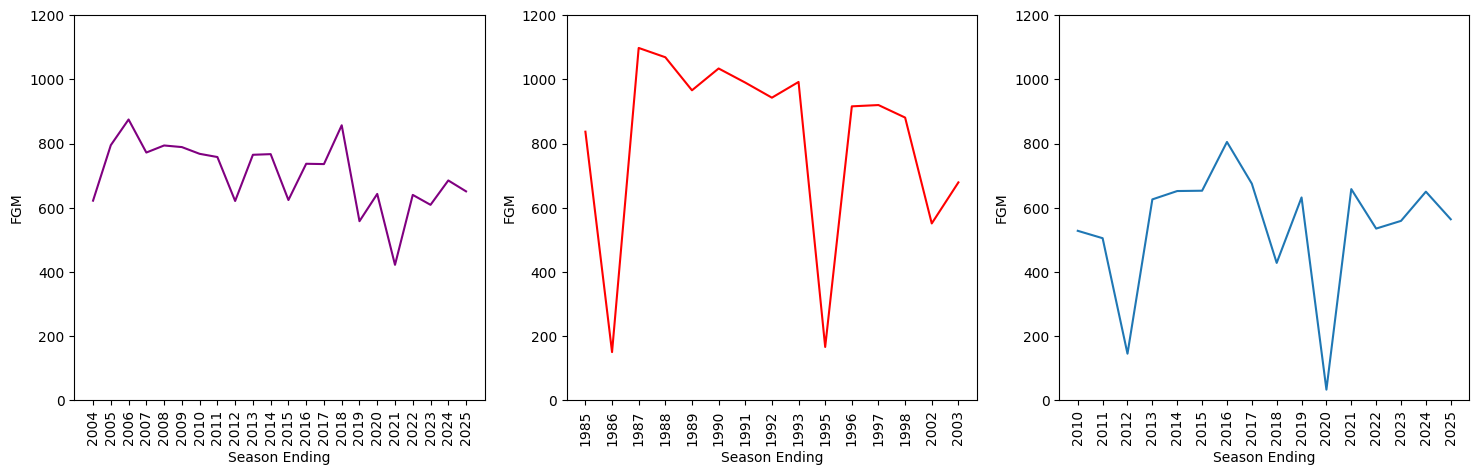

In [29]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_lbj, lbj['Season ending'])
plt.ylim(0,1200)
sns.lineplot(data=lbj, x=x_lbj,y="FGM", color="purple");

plt.subplot(1,3,2)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_mj, mj['Season ending'])
plt.ylim(0,1200)
sns.lineplot(data=mj, x=x_mj, y="FGM", color="red");

plt.subplot(1,3,3)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_curry, curry['Season ending'])
plt.ylim(0,1200)
sns.lineplot(data=curry, x=x_curry, y="FGM");

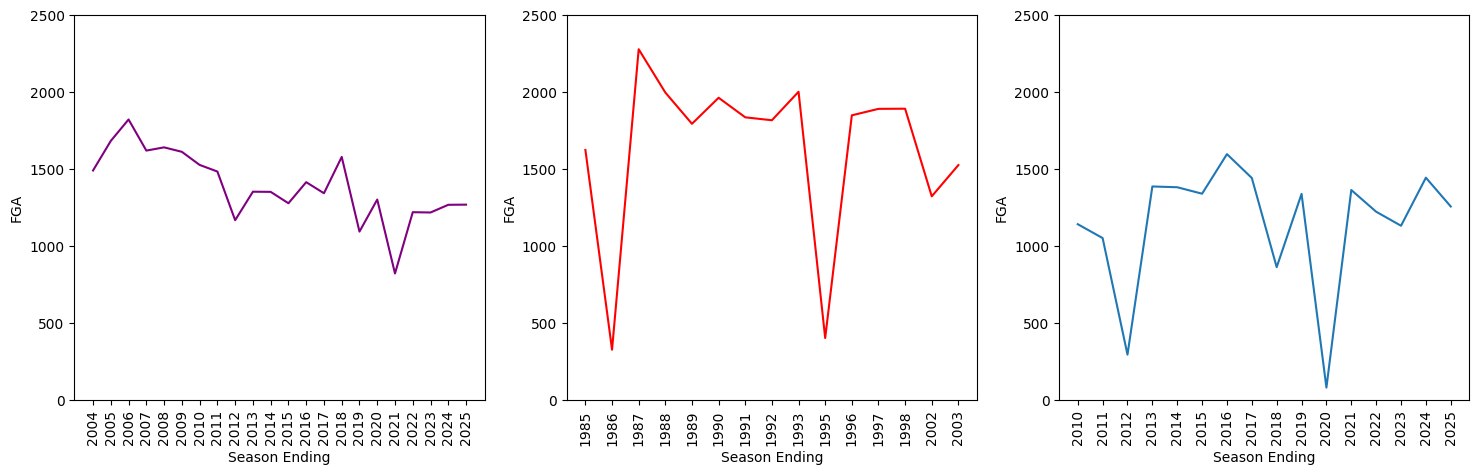

In [30]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_lbj, lbj['Season ending'])
plt.ylim(0,2500)
sns.lineplot(data=lbj, x=x_lbj,y="FGA", color="purple");

plt.subplot(1,3,2)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_mj, mj['Season ending'])
plt.ylim(0,2500)
sns.lineplot(data=mj, x=x_mj, y="FGA", color="red");

plt.subplot(1,3,3)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_curry, curry['Season ending'])
plt.ylim(0,2500)
sns.lineplot(data=curry, x=x_curry, y="FGA");

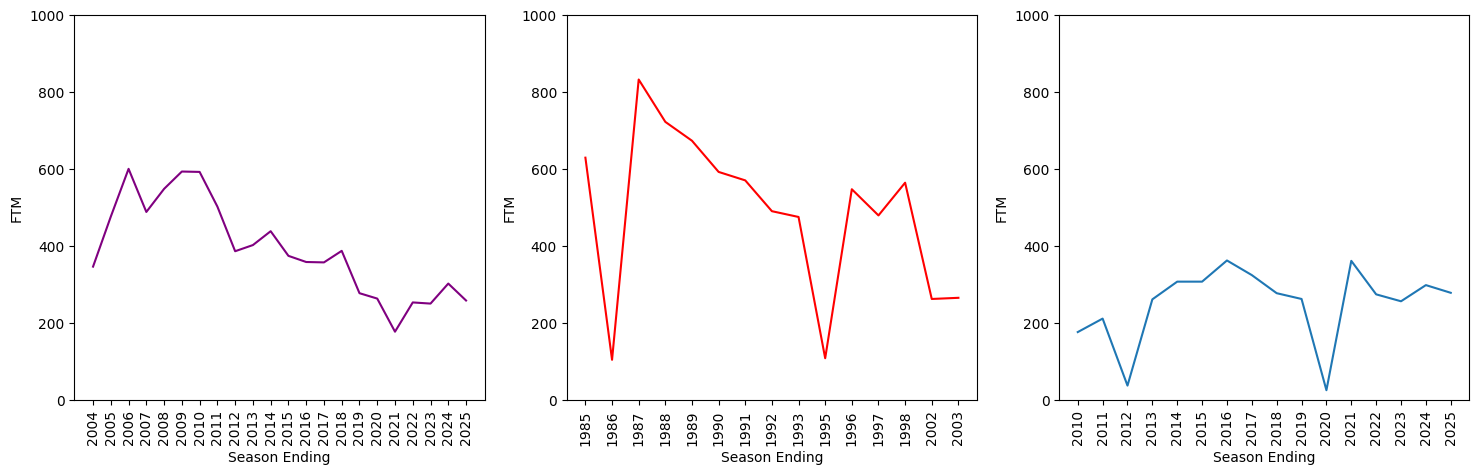

In [31]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_lbj, lbj['Season ending'])
plt.ylim(0,1000)
sns.lineplot(data=lbj, x=x_lbj,y="FTM", color="purple");

plt.subplot(1,3,2)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_mj, mj['Season ending'])
plt.ylim(0,1000)
sns.lineplot(data=mj, x=x_mj, y="FTM", color="red");

plt.subplot(1,3,3)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_curry, curry['Season ending'])
plt.ylim(0,1000)
sns.lineplot(data=curry, x=x_curry, y="FTM");

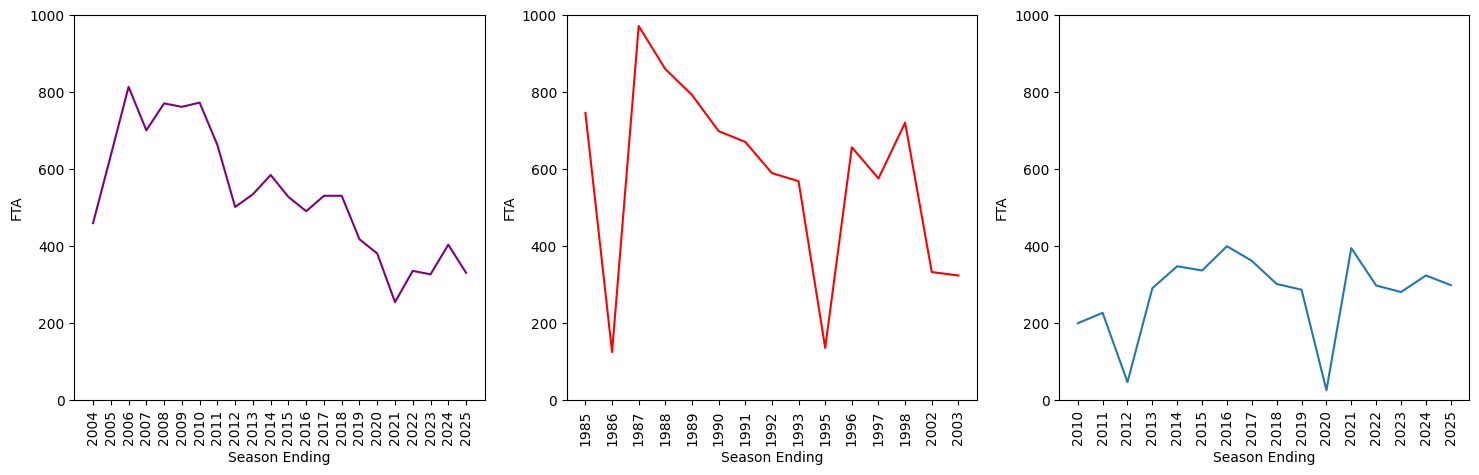

In [32]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_lbj, lbj['Season ending'])
plt.ylim(0,1000)
sns.lineplot(data=lbj, x=x_lbj,y="FTA", color="purple");

plt.subplot(1,3,2)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_mj, mj['Season ending'])
plt.ylim(0,1000)
sns.lineplot(data=mj, x=x_mj, y="FTA", color="red");

plt.subplot(1,3,3)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_curry, curry['Season ending'])
plt.ylim(0,1000)
sns.lineplot(data=curry, x=x_curry, y="FTA");

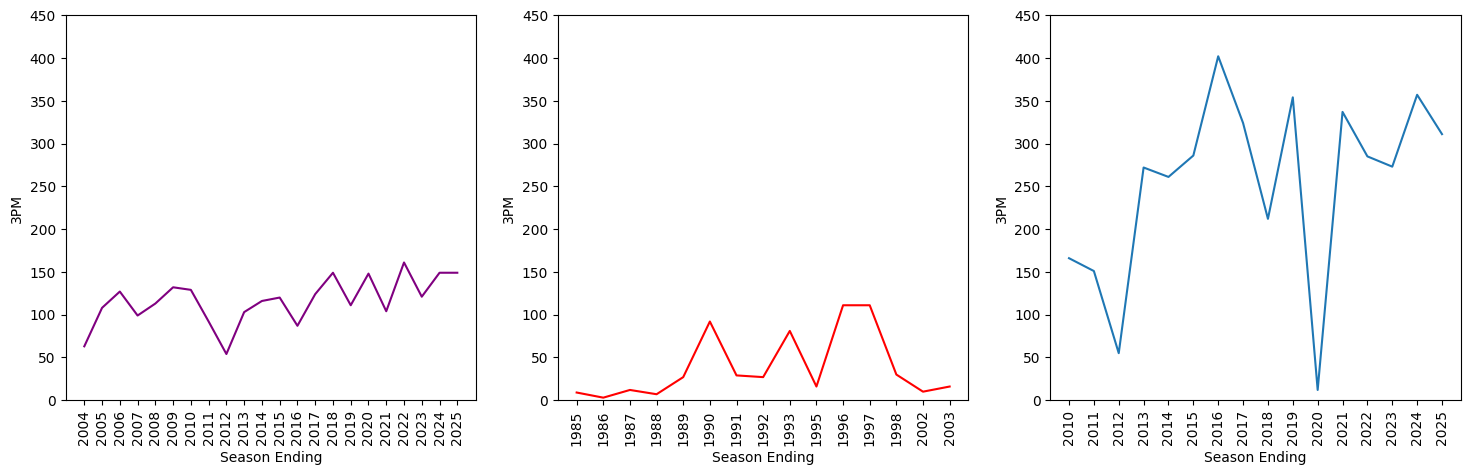

In [33]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_lbj, lbj['Season ending'])
plt.ylim(0,450)
sns.lineplot(data=lbj, x=x_lbj,y="3PM", color="purple");

plt.subplot(1,3,2)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_mj, mj['Season ending'])
plt.ylim(0,450)
sns.lineplot(data=mj, x=x_mj, y="3PM", color="red");

plt.subplot(1,3,3)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_curry, curry['Season ending'])
plt.ylim(0,450)
sns.lineplot(data=curry, x=x_curry, y="3PM");

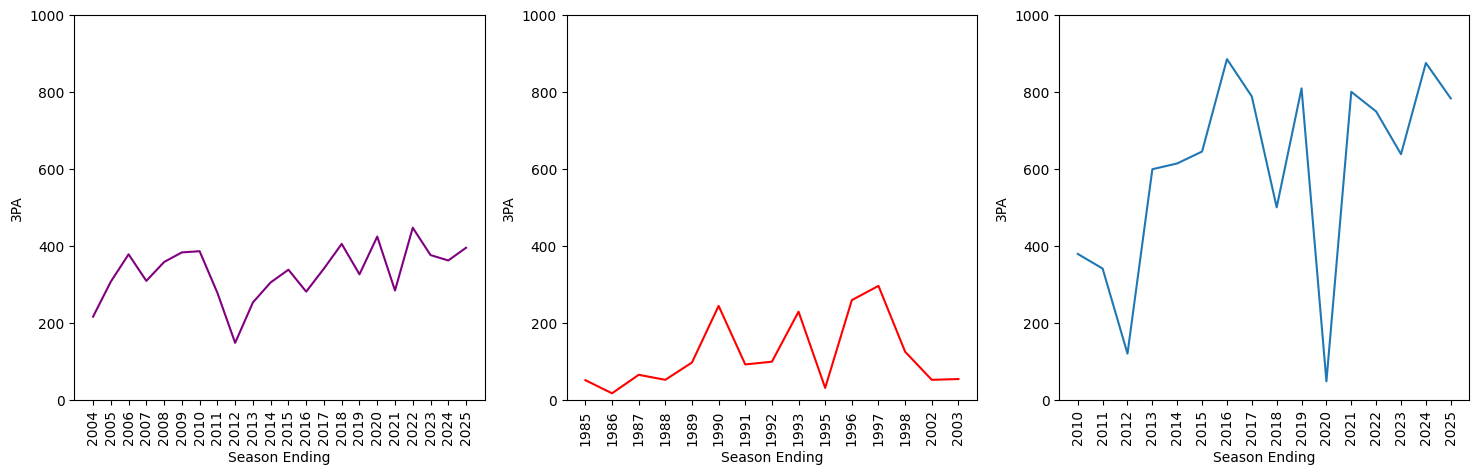

In [34]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_lbj, lbj['Season ending'])
plt.ylim(0,1000)
sns.lineplot(data=lbj, x=x_lbj,y="3PA",color="purple");

plt.subplot(1,3,2)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_mj, mj['Season ending'])
plt.ylim(0,1000)
sns.lineplot(data=mj, x=x_mj, y="3PA", color="red");

plt.subplot(1,3,3)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_curry, curry['Season ending'])
plt.ylim(0,1000)
sns.lineplot(data=curry, x=x_curry, y="3PA");

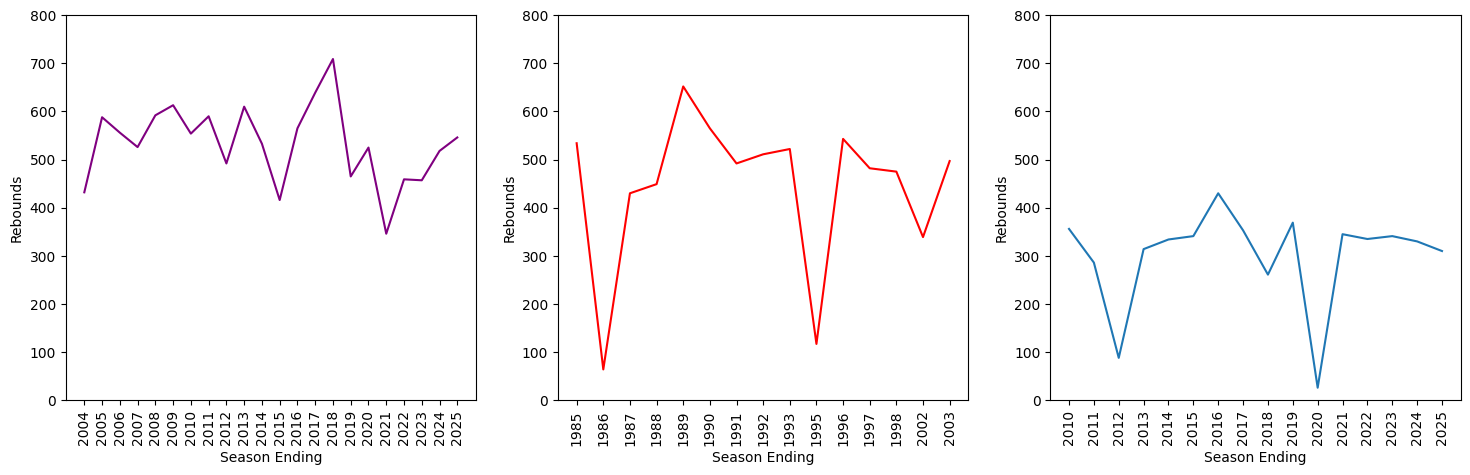

In [35]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_lbj, lbj['Season ending'])
sns.lineplot(data=lbj, x=x_lbj,y="Rebounds", color="purple");
plt.ylim(0,800)

plt.subplot(1,3,2)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_mj, mj['Season ending'])
plt.ylim(0,800)
sns.lineplot(data=mj, x=x_mj, y="Rebounds", color="red");

plt.subplot(1,3,3)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_curry, curry['Season ending'])
plt.ylim(0,800)
sns.lineplot(data=curry, x=x_curry, y="Rebounds");

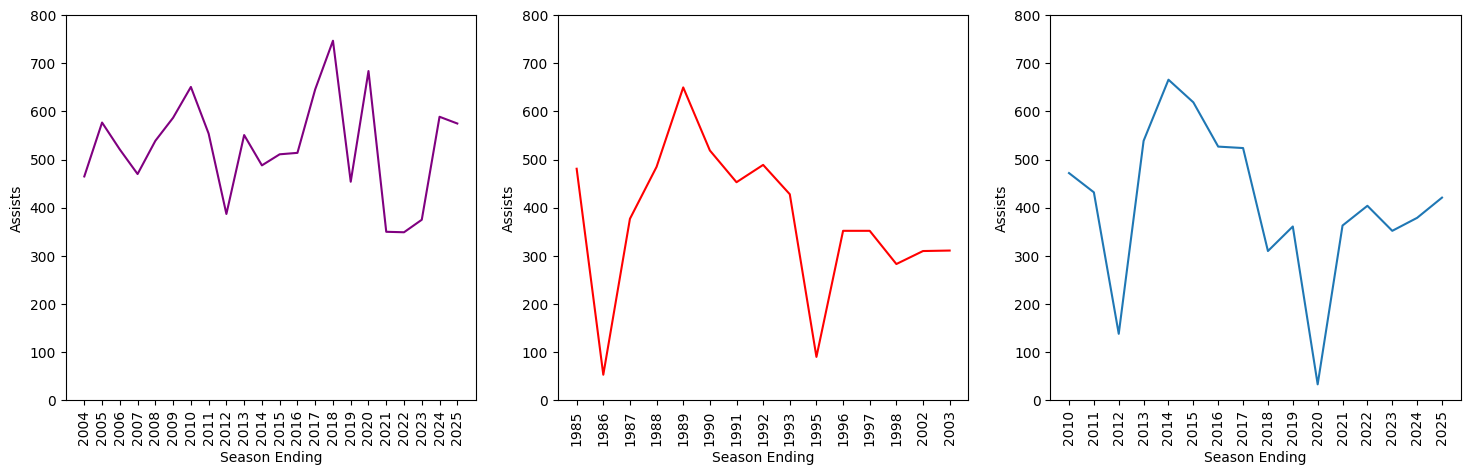

In [36]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_lbj, lbj['Season ending'])
plt.ylim(0,800)
sns.lineplot(data=lbj, x=x_lbj,y="Assists", color="purple");

plt.subplot(1,3,2)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_mj, mj['Season ending'])
plt.ylim(0,800)
sns.lineplot(data=mj, x=x_mj, y="Assists", color="red");

plt.subplot(1,3,3)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_curry, curry['Season ending'])
plt.ylim(0,800)
sns.lineplot(data=curry, x=x_curry, y="Assists");

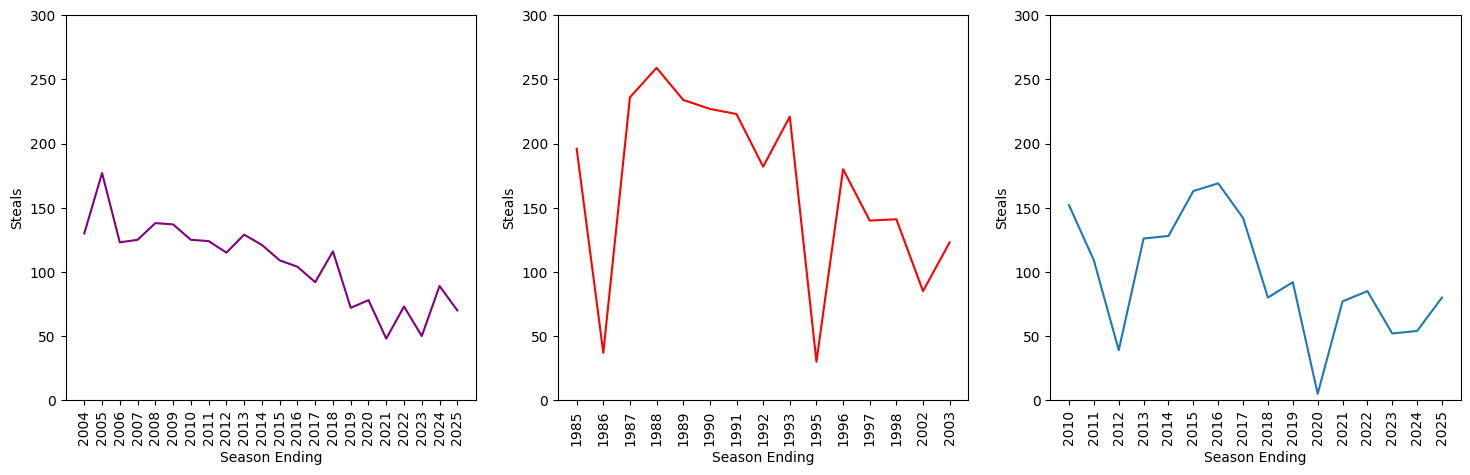

In [37]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_lbj, lbj['Season ending'])
plt.ylim(0,300)
sns.lineplot(data=lbj, x=x_lbj,y="Steals", color="purple");

plt.subplot(1,3,2)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_mj, mj['Season ending'])
plt.ylim(0,300)
sns.lineplot(data=mj, x=x_mj, y="Steals", color="red");

plt.subplot(1,3,3)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_curry, curry['Season ending'])
plt.ylim(0,300)
sns.lineplot(data=curry, x=x_curry, y="Steals");

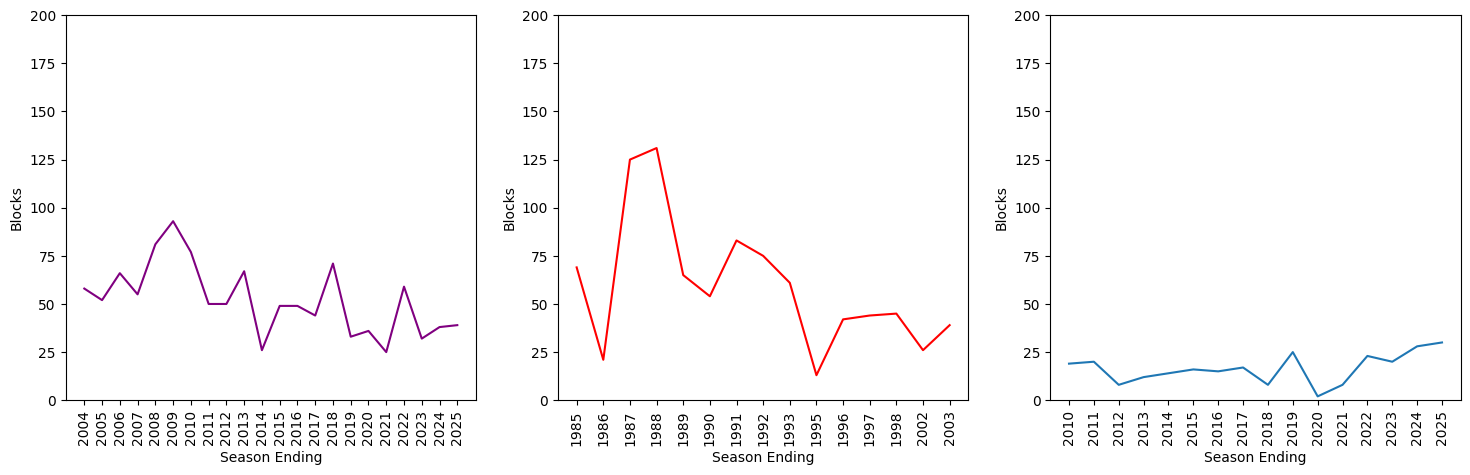

In [38]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_lbj, lbj['Season ending'])
plt.ylim(0,200)
sns.lineplot(data=lbj, x=x_lbj,y="Blocks", color="purple");

plt.subplot(1,3,2)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_mj, mj['Season ending'])
plt.ylim(0,200)
sns.lineplot(data=mj, x=x_mj, y="Blocks", color="red");

plt.subplot(1,3,3)
plt.xlabel("Season Ending")
plt.xticks(rotation=90)
plt.xticks(x_curry, curry['Season ending'])
plt.ylim(0,200)
sns.lineplot(data=curry, x=x_curry, y="Blocks");

**NOTES**

Each NBA team plays 82 regular-season games.

Dips in cumulative stats in Games and/or Minutes are due to season-ending injuries for Michael Jordan (1986 and 2002) or returning from his first retirement in 1995. In the 15 seasons he played, MJ has played less than 80 games in a season no more than 4 times in his career. He played all 82 games in a season 9 times in his career.

Same for Steph Curry in 2012 and 2020 (seasons cut short due to early injury). Steph Curry has played 80 or more games in a season only twice in his career.

in the 21 seasons (and counting) he's played, LeBron James has played less than 50 games in a season once in his career. He has played 80 or more games in a season only 3 times in his career.


In [39]:
#creating heatmaps. removing "Season ending" since that has no bearing in this context

In [40]:
lbj=lbj.drop(["Season ending"], axis=1)
mj=mj.drop(["Season ending"], axis=1)
curry=curry.drop(["Season ending"], axis=1)

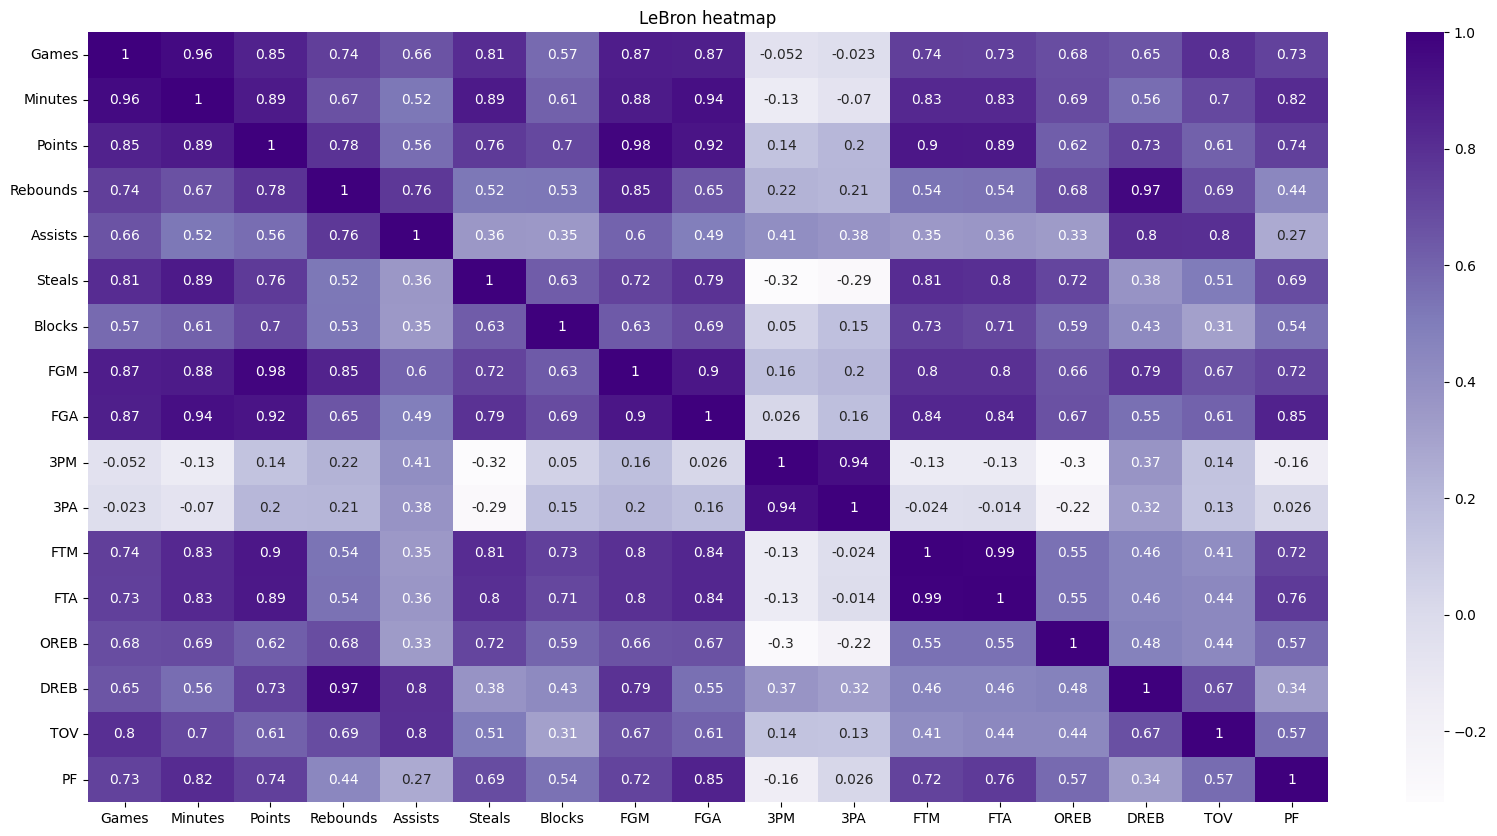

In [41]:
plt.figure(figsize=(20,10))
plt.title("LeBron heatmap")
lbj_corr=lbj.corr()
sns.heatmap(lbj_corr, annot=True, cmap="Purples")
plt.show()

**OBSERVATIONS/RECOMMENDATIONS**

3PM and 3PA have low correlation to point total.
FGM and FGA have the highest corrleation to point total. FTM and FTA have very high correlation, as well.

LeBron should de-emphasize shooting 3s, as they have a very low correlation to his point totals. Being aggressive and going to the free throw line will yield better overall results.

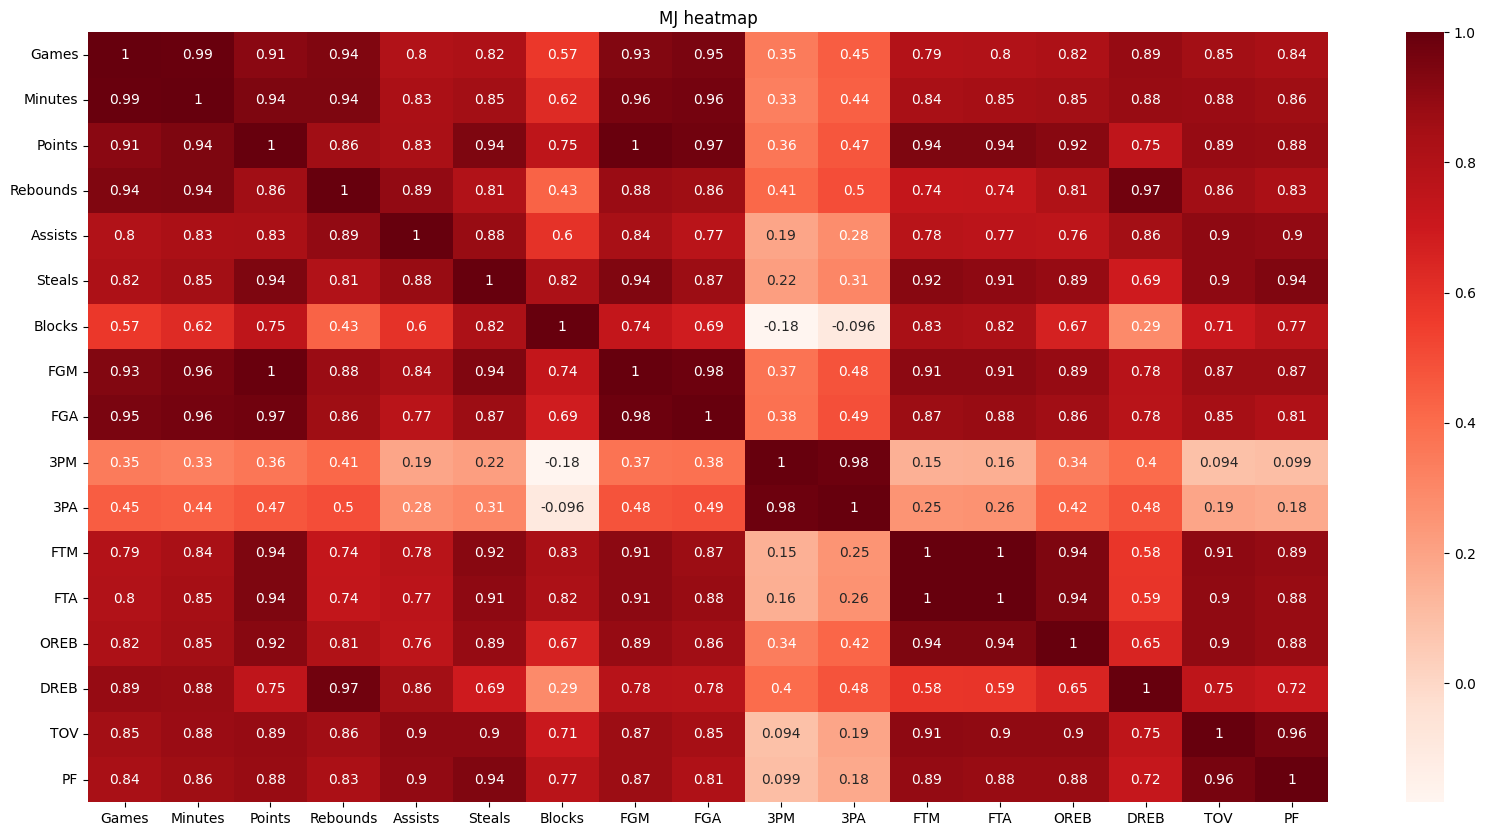

In [42]:
plt.figure(figsize=(20,10))
plt.title("MJ heatmap")
mj_corr=mj.corr()
sns.heatmap(mj_corr, annot=True, cmap = "Reds")
plt.show()

**OBSERVATIONS**

As the NBA player with the highest career scoring average, this heatmap comes as no surprise.

FGM had a 1 to 1 correlation to his point total.
That said, FGA, FTM, and FTA have extremely high correlation to his point total, as well, higher than LeBron's.
While 3PM and 3PA have the least correlation to his point total, the correlation for Jordan is better than the 3PM/3PA correlation for LeBron James.

Michael was not known as a 3-point shooter, but shooting them worked better for him than it did for LeBron.

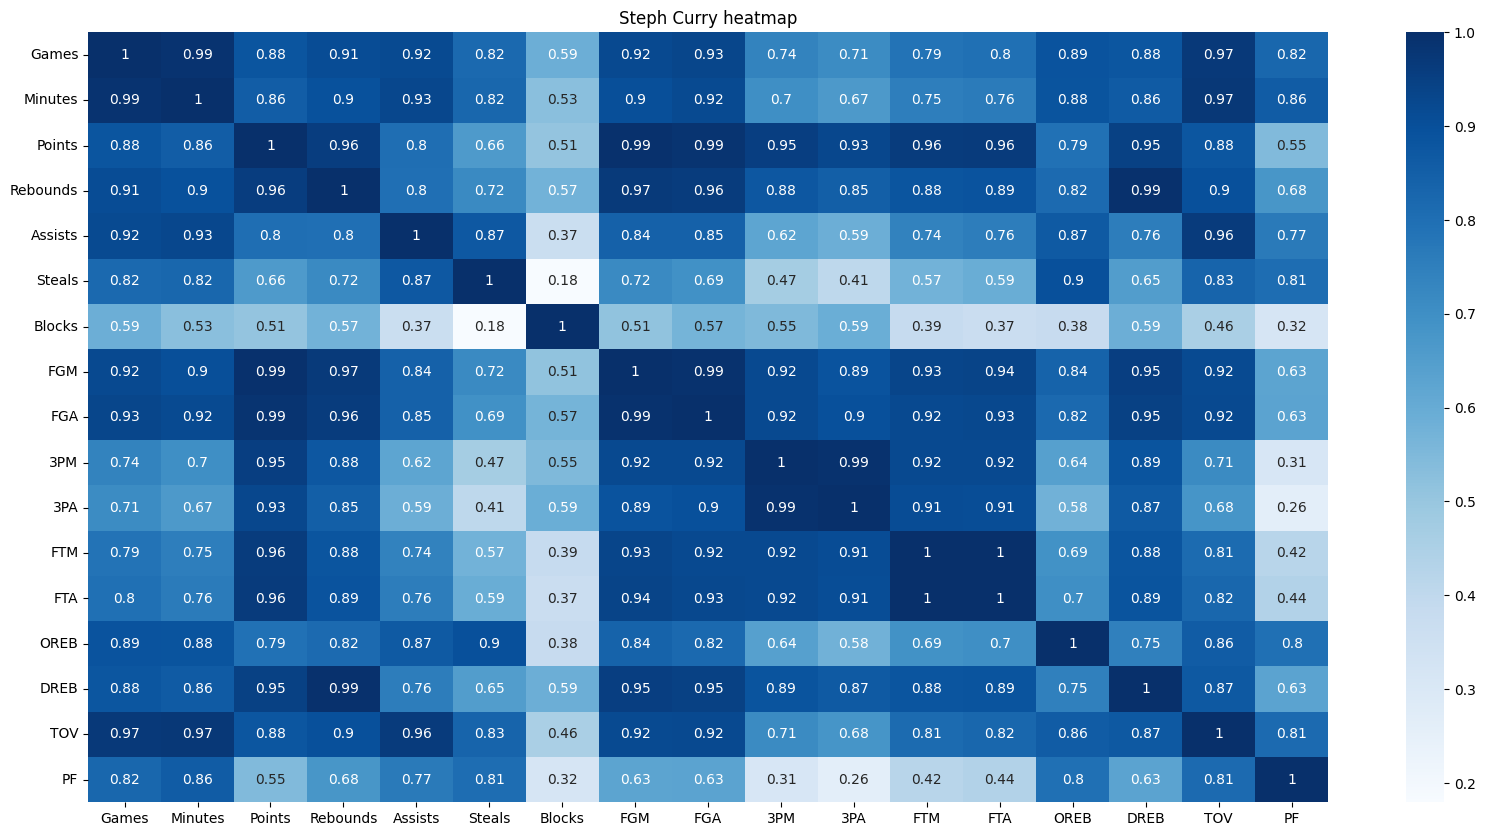

In [43]:
plt.figure(figsize=(20,10))
plt.title("Steph Curry heatmap")
curry_corr=curry.corr()
sns.heatmap(curry_corr, annot=True, cmap = "Blues")
plt.show()

**OBSERVATIONS/RECOMMENDATIONS**

Steph Curry scores from literally anywhere on the court, and the heatmap shows it. High correlation between FGM, FGA, 3PM, and 3PA and point total. There is high correlation with FTM and FTM, as well; however, cumulative FTM and FTA totals per season (as displayed in the lineplots) show he is an outside-in player, while Jordan and LeBron are not.

